In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('ibm.csv')

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
df.apply(lambda x: len(x.unique()))

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [7]:
df = df.drop(['Over18','EmployeeCount','StandardHours'],axis=1)

In [8]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [9]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

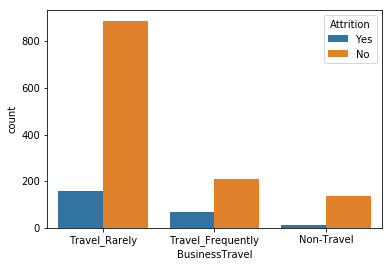

In [10]:
sns.countplot(df['BusinessTravel'],hue=df.Attrition)

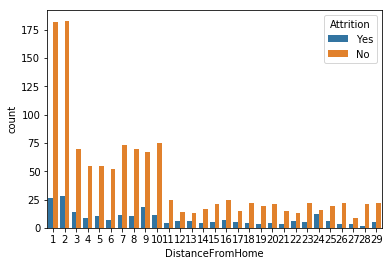

In [11]:
sns.countplot(df['DistanceFromHome'],hue=df.Attrition)

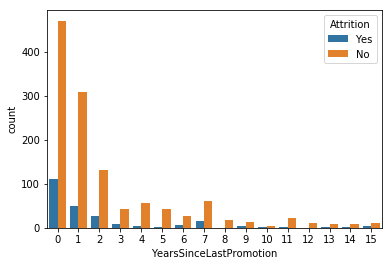

In [12]:
sns.countplot(df.YearsSinceLastPromotion,hue=df.Attrition)

In [13]:
def dummyEncode(df):
    column = list(df.select_dtypes(include=['category','object']))
    for x in column:
        dummies = pd.get_dummies(df[x],prefix = x,dummy_na = False)
        df = df.drop(x,1)
        df = pd.concat([df,dummies],axis=1)
    return df

In [14]:
x = df.drop('Attrition',axis=1)
y = df['Attrition']
x = dummyEncode(x)
y = y.replace({"Yes":1,"No":0})

In [15]:
x.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,2,94,3,2,4,...,0,0,0,1,0,0,0,1,0,1
1,49,279,8,1,2,3,61,2,2,2,...,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,2,4,4,92,2,1,3,...,0,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,5,4,56,3,1,3,...,0,0,1,0,0,0,1,0,0,1
4,27,591,2,1,7,1,40,3,1,2,...,0,0,0,0,0,0,1,0,1,0


In [16]:
import sklearn.feature_selection
select = sklearn.feature_selection.SelectKBest(k=20)

In [17]:
x,xt,y,yt = train_test_split(x,y,test_size=.1,random_state=1)

In [18]:
col = select.fit(x,y)

index = col.get_support(indices=True)
cols = [x.columns[i] for i in index]

In [19]:
x = x[cols]
xt = xt[cols]

In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
oversampler=SMOTE(random_state=0)
x,y = oversampler.fit_sample(x,y)

In [22]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score,cross_val_predict

In [23]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))  

In [24]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x,y)
#for train, test in skf.split(x, y):
    #print_score(clf,x[train],y[train],x[test],y[test],t=True)
    #print_score(clf,x[train],y[train],x[test],y[test],t=False)
    


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [25]:
print_score(clf,x,y,xt,yt,train=True)

Train Result:

accuracy score: 1.0000

Classification Report: 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00      1117
          1       1.00      1.00      1.00      1117

avg / total       1.00      1.00      1.00      2234


Confusion Matrix: 
 [[1117    0]
 [   0 1117]]

Average Accuracy: 	 0.8717
Accuracy SD: 		 0.0982


In [26]:
print_score(clf,x,y,xt,yt,train=False)

Test Result:

accuracy score: 0.7143

Classification Report: 
              precision    recall  f1-score   support

          0       0.83      0.80      0.82       116
          1       0.34      0.39      0.36        31

avg / total       0.73      0.71      0.72       147


Confusion Matrix: 
 [[93 23]
 [19 12]]



## Bagging Classifier

In [27]:
bc = BaggingClassifier(clf,n_estimators=500,oob_score=False,n_jobs=-1,random_state=None)
bc.fit(x,y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [28]:
print_score(bc,x,y,xt,yt,train=True)

Train Result:

accuracy score: 1.0000

Classification Report: 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00      1117
          1       1.00      1.00      1.00      1117

avg / total       1.00      1.00      1.00      2234


Confusion Matrix: 
 [[1117    0]
 [   0 1117]]

Average Accuracy: 	 0.9164
Accuracy SD: 		 0.1100


In [29]:
print_score(bc,x,y,xt,yt,train=False)

Test Result:

accuracy score: 0.8095

Classification Report: 
              precision    recall  f1-score   support

          0       0.84      0.94      0.89       116
          1       0.59      0.32      0.42        31

avg / total       0.79      0.81      0.79       147


Confusion Matrix: 
 [[109   7]
 [ 21  10]]



In [30]:
bcc = BaggingClassifier(clf,n_estimators=500,oob_score=True,n_jobs=-1,random_state=None)
bcc.fit(x,y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=500, n_jobs=-1, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [31]:
bcc.oob_score_

0.9256938227394808

In [32]:
print_score(bcc,x,y,xt,yt,train=False)

Test Result:

accuracy score: 0.8095

Classification Report: 
              precision    recall  f1-score   support

          0       0.84      0.94      0.89       116
          1       0.59      0.32      0.42        31

avg / total       0.79      0.81      0.79       147


Confusion Matrix: 
 [[109   7]
 [ 21  10]]



##  Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rf = RandomForestClassifier(random_state=42)

In [35]:
rf.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [36]:
print_score(rf,x,y,xt,yt)

Train Result:

accuracy score: 0.9964

Classification Report: 
              precision    recall  f1-score   support

          0       0.99      1.00      1.00      1117
          1       1.00      0.99      1.00      1117

avg / total       1.00      1.00      1.00      2234


Confusion Matrix: 
 [[1117    0]
 [   8 1109]]

Average Accuracy: 	 0.9151
Accuracy SD: 		 0.1037


In [37]:
print_score(rf,x,y,xt,yt,False)

Test Result:

accuracy score: 0.7823

Classification Report: 
              precision    recall  f1-score   support

          0       0.81      0.95      0.87       116
          1       0.45      0.16      0.24        31

avg / total       0.73      0.78      0.74       147


Confusion Matrix: 
 [[110   6]
 [ 26   5]]



In [38]:
from sklearn.metrics import accuracy_score

##  Grid Search 

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)

In [41]:
param = {'max_depth':[3,None],
        'min_samples_split':[3,3,10],
         "min_samples_leaf":[1,3,10],
         'bootstrap':[True,False],
         'criterion':['gini','entropy'] 
        }

In [42]:
gcv = GridSearchCV(rfc,param_grid=param,scoring='accuracy',cv=5,n_jobs=-1,verbose=1)

In [43]:
gcv.fit(x,y)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    4.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, None], 'min_samples_split': [3, 3, 10], 'min_samples_leaf': [1, 3, 10], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [44]:
gcv.best_score_

0.9122649955237243

In [45]:
print_score(gcv,x,y,xt,yt)

Train Result:

accuracy score: 0.9866

Classification Report: 
              precision    recall  f1-score   support

          0       0.98      1.00      0.99      1117
          1       1.00      0.98      0.99      1117

avg / total       0.99      0.99      0.99      2234


Confusion Matrix: 
 [[1114    3]
 [  27 1090]]

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    4.8s finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    4.8s finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    5.3s finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    4.3s finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    5.1s finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    4.9s finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    5.1s finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    5.4s finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    4.9s finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    4.9s finished


Average Accuracy: 	 0.9111
Accuracy SD: 		 0.1168


In [46]:
print_score(gcv,x,y,xt,yt,False)

Test Result:

accuracy score: 0.8027

Classification Report: 
              precision    recall  f1-score   support

          0       0.83      0.95      0.88       116
          1       0.57      0.26      0.36        31

avg / total       0.77      0.80      0.77       147


Confusion Matrix: 
 [[110   6]
 [ 23   8]]



##  Extremely RT

In [47]:
from sklearn.ensemble import ExtraTreesClassifier

In [48]:
etc = ExtraTreesClassifier(random_state=42)

In [49]:
etc.fit(x,y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [50]:
print_score(etc,x,y,xt,yt)

Train Result:

accuracy score: 1.0000

Classification Report: 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00      1117
          1       1.00      1.00      1.00      1117

avg / total       1.00      1.00      1.00      2234


Confusion Matrix: 
 [[1117    0]
 [   0 1117]]

Average Accuracy: 	 0.9312
Accuracy SD: 		 0.0823


In [51]:
print_score(etc,x,y,xt,yt,False)

Test Result:

accuracy score: 0.7755

Classification Report: 
              precision    recall  f1-score   support

          0       0.81      0.93      0.87       116
          1       0.43      0.19      0.27        31

avg / total       0.73      0.78      0.74       147


Confusion Matrix: 
 [[108   8]
 [ 25   6]]



## Adaboast

In [52]:
from sklearn.ensemble import AdaBoostClassifier

In [53]:
abc = AdaBoostClassifier(RandomForestClassifier())

In [54]:
abc.fit(x,y)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [55]:
print_score(abc,x,y,xt,yt)

Train Result:

accuracy score: 1.0000

Classification Report: 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00      1117
          1       1.00      1.00      1.00      1117

avg / total       1.00      1.00      1.00      2234


Confusion Matrix: 
 [[1117    0]
 [   0 1117]]

Average Accuracy: 	 0.9285
Accuracy SD: 		 0.1087


In [56]:
print_score(abc,x,y,xt,yt,False)

Test Result:

accuracy score: 0.7823

Classification Report: 
              precision    recall  f1-score   support

          0       0.83      0.91      0.87       116
          1       0.47      0.29      0.36        31

avg / total       0.75      0.78      0.76       147


Confusion Matrix: 
 [[106  10]
 [ 22   9]]



## Gradient Boosting Machine

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

In [58]:
gcf =GradientBoostingClassifier()

In [59]:
gcf.fit(x,y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [60]:
print_score(gcf,x,y,xt,yt)

Train Result:

accuracy score: 0.9490

Classification Report: 
              precision    recall  f1-score   support

          0       0.92      0.98      0.95      1117
          1       0.98      0.91      0.95      1117

avg / total       0.95      0.95      0.95      2234


Confusion Matrix: 
 [[1099   18]
 [  96 1021]]

Average Accuracy: 	 0.9053
Accuracy SD: 		 0.1279


In [61]:
print_score(gcf,x,y,xt,yt,False)

Test Result:

accuracy score: 0.8571

Classification Report: 
              precision    recall  f1-score   support

          0       0.86      0.98      0.92       116
          1       0.86      0.39      0.53        31

avg / total       0.86      0.86      0.84       147


Confusion Matrix: 
 [[114   2]
 [ 19  12]]

